<a href="https://colab.research.google.com/github/JiHoonMin/deeplearning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lab 1: Simple RNN

### Generate the Dataset

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
np.random.seed(42)
# gen 10000 series len n_steps + 1
# train : val : test = 7 : 2 : 1
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

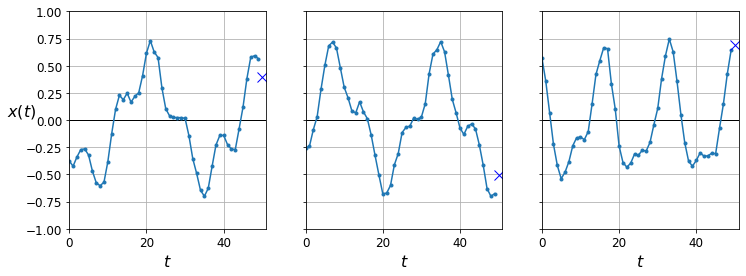

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None: # mark 
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

### Computing Some Baselines

### Naive predictions (just predict the last observed value)

In [ ]:
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.020211367

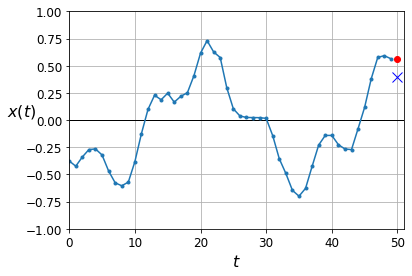

In [ ]:
plot_series(X_valid[0,:,0],y_valid[0,0],y_pred[0,0])
plt.show()

### Linear predictions

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[50,1]),
                                 keras.layers.Dense(1)
                                
])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs = 20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1001 - val_loss: 0.0545
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0266
Epoch 3/20
219/219 [==============================] - 0s 994us/step - loss: 0.0202 - val_loss: 0.0157
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
219/219 [==============================] - 0s 978us/step - loss: 0.0080 - val_loss: 0.0079
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 10/20
219/219 [==============================] - 0s 981us/step - loss: 0.0061 - val_loss: 

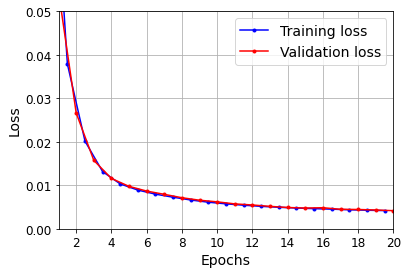

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

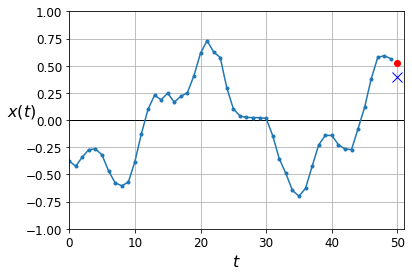

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0,:,0],y_valid[0,0],y_pred[0,0])
plt.show()

### Using a Simple RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(1,input_shape=[None,1]),
                                                          
])
optimizer= keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse",optimizer=optimizer)
history = model.fit(X_train,y_train,epochs = 20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0116 - val_loss: 0.0110

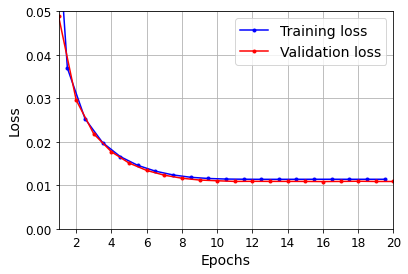

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

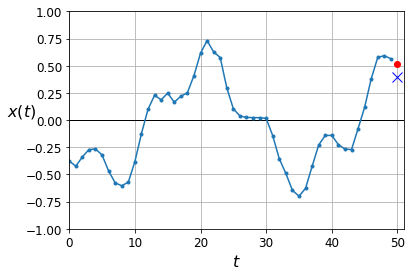

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0,:,0],y_valid[0,0],y_pred[0,0])
plt.show()

# Lab 2: Deep RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20),
      keras.layers.Dense(1)
                                                          
])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs = 20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0030 - val_lo

In [ ]:
model.evaluate(X_valid,y_valid)

63/63 [==============================] - 0s 4ms/step - loss: 0.0026


0.0026236234698444605

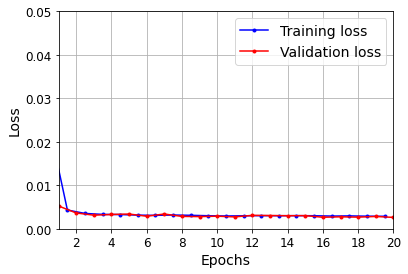

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

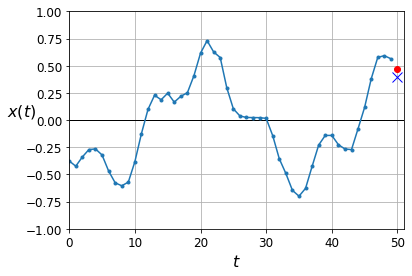

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0,:,0],y_valid[0,0],y_pred[0,0])
plt.show()

# Lab 3: Forecasting Several Steps Ahead

## Sequence to vector 1

In [ ]:
np.random.seed(43) #not 42, as it would give the first series in the tarin set

series =generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:,:n_steps], series[:,n_steps:]
X=X_new
for step_ahead in range(10):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]#predict next step
  X= np.concatenate([X,y_pred_one], axis =1) #add predict value to the input

Y_pred = X[:, n_steps:]

In [ ]:
Y_pred.shape

(1, 10, 1)

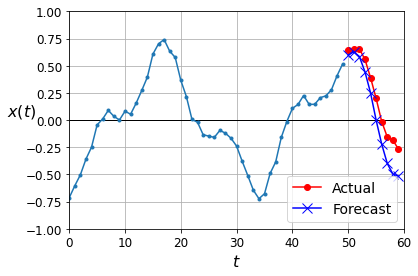

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

## Sequence to vector 2

### Generate data

Now let's use this model to predict the next 10 values. We first need to regenerate the sequences with 9 more time steps.

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 10))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20),
      keras.layers.Dense(10)
                                                          
])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,Y_train,epochs = 20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0669 - val_loss: 0.0317
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0265 - val_loss: 0.0200
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0183 - val_loss: 0.0160
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0139 - val_loss: 0.0118
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0110 - val_lo

In [ ]:
np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

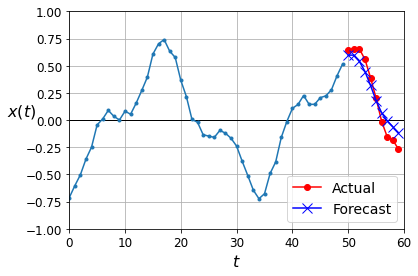

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

## Sequence to sequence

Now let's create an RNN that predicts the next 10 steps at each time step. That is, instead of just forecasting time steps 50 to 59 based on time steps 0 to 49, it will forecast time steps 1 to 10 at time step 0, then time steps 2 to 11 at time step 1, and so on, and finally it will forecast time steps 50 to 59 at the last time step. Notice that the model is causal: when it makes predictions at any time step, it can only see past time steps.

### Generate data

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]

# each target is a sequence of 10D vectors
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20,return_sequences=True),
      keras.layers.TimeDistributed(keras.layers.Dense(10))
                                                          
])

def last_time_step_mse(Y_true,Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1],Y_pred[:, -1])

model.compile(loss="mse",optimizer=keras.optimizers.Adam(lr=0.01),metrics=[last_time_step_mse])
history = model.fit(X_train,Y_train,epochs = 20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0508 - last_time_step_mse: 0.0400 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0395 - last_time_step_mse: 0.0283 - val_loss: 0.0363 - val_last_time_step_mse: 0.0260
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0325 - last_time_step_mse: 0.0214 - val_loss: 0.0368 - val_last_time_step_mse: 0.0279
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0298 - last_time_step_mse: 0.0188 - val_loss: 0.0273 - val_last_time_step_mse: 0.0155
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0270 - last_time_step_mse: 0.0149 - val_loss: 0.0266 - val_last_time_step_mse: 0.0163
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0250 - last_time_step_mse: 0.0123 - val_loss: 0.0248 - val_last_time_step_mse: 0.0122
Epoch 7/20
219/219 [==

In [ ]:
np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

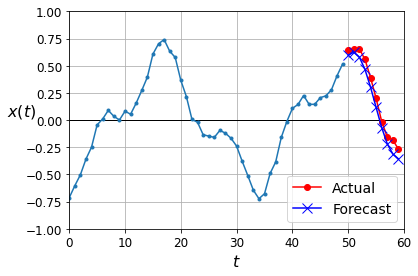

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# Lab 4: LSTM and GRU

## LSTM

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20,return_sequences=True),
      keras.layers.TimeDistributed(keras.layers.Dense(10))
                                                          
])


model.compile(loss="mse",optimizer="adam",metrics=[last_time_step_mse])
history = model.fit(X_train,Y_train,epochs = 20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0742 - last_time_step_mse: 0.0644 - val_loss: 0.0472 - val_last_time_step_mse: 0.0338
Epoch 2/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0441 - last_time_step_mse: 0.0312 - val_loss: 0.0411 - val_last_time_step_mse: 0.0281
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0397 - last_time_step_mse: 0.0255 - val_loss: 0.0407 - val_last_time_step_mse: 0.0310
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0375 - last_time_step_mse: 0.0227 - val_loss: 0.0360 - val_last_time_step_mse: 0.0218
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0357 - last_time_step_mse: 0.0206 - val_loss: 0.0348 - val_last_time_step_mse: 0.0225
Epoch 6/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0344 - last_time_step_mse: 0.0195 - val_loss: 0.0344 - val_last_time_step_mse: 0.0184
Epoch 7/20
219/219 [==

In [ ]:
model.evaluate(X_valid,Y_valid)

63/63 [==============================] - 0s 4ms/step - loss: 0.0261 - last_time_step_mse: 0.0119


[0.026095833629369736, 0.011907713487744331]

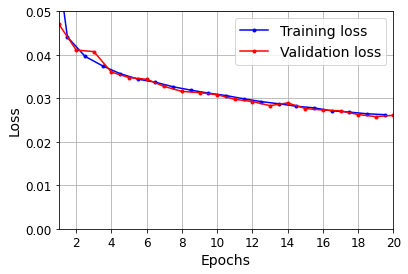

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 +10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][...,np.newaxis]

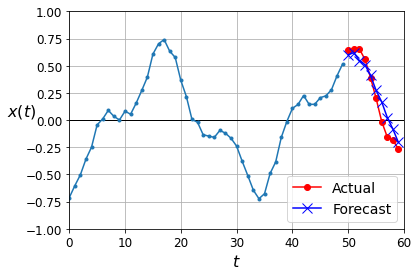

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

## GRU

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20,return_sequences=True),
      keras.layers.TimeDistributed(keras.layers.Dense(10))
                                                          
])


model.compile(loss="mse",optimizer="adam",metrics=[last_time_step_mse])
history = model.fit(X_train,Y_train,epochs = 20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0742 - last_time_step_mse: 0.0644 - val_loss: 0.0472 - val_last_time_step_mse: 0.0338
Epoch 2/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0441 - last_time_step_mse: 0.0312 - val_loss: 0.0411 - val_last_time_step_mse: 0.0281
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0397 - last_time_step_mse: 0.0255 - val_loss: 0.0407 - val_last_time_step_mse: 0.0310
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0375 - last_time_step_mse: 0.0227 - val_loss: 0.0360 - val_last_time_step_mse: 0.0218
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0357 - last_time_step_mse: 0.0206 - val_loss: 0.0348 - val_last_time_step_mse: 0.0225
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0344 - last_time_step_mse: 0.0195 - val_loss: 0.0344 - val_last_time_step_mse: 0.0184
Epoch 7/20
219/219 [==

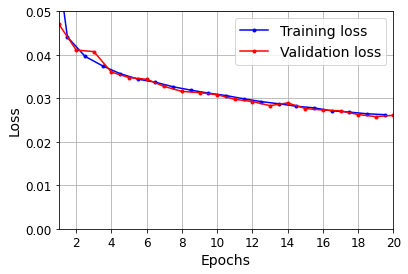

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 +10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][...,np.newaxis]

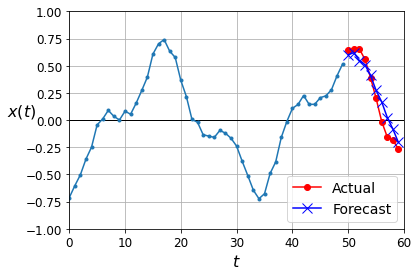

In [ ]:
plot_multiple_forecasts(X_new,Y_new,Y_pred)
plt.show()

#Exercise

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 20)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]

# each target is a sequence of 10D vectors
Y = np.empty((10000, n_steps, 20))
for step_ahead in range(1, 20 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20,return_sequences=True),
      keras.layers.TimeDistributed(keras.layers.Dense(20))
                                                          
])

def last_time_step_mse(Y_true,Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1],Y_pred[:, -1])

model.compile(loss="mse",optimizer=keras.optimizers.Adam(lr=0.01),metrics=[last_time_step_mse])
history = model.fit(X_train,Y_train,epochs = 20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0676 - last_time_step_mse: 0.0591 - val_loss: 0.0564 - val_last_time_step_mse: 0.0443
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0598 - last_time_step_mse: 0.0515 - val_loss: 0.0544 - val_last_time_step_mse: 0.0455
Epoch 3/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0574 - last_time_step_mse: 0.0496 - val_loss: 0.0524 - val_last_time_step_mse: 0.0445
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0518 - last_time_step_mse: 0.0420 - val_loss: 0.0472 - val_last_time_step_mse: 0.0350
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0466 - last_time_step_mse: 0.0341 - val_loss: 0.0438 - val_last_time_step_mse: 0.0272
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0423 - last_time_step_mse: 0.0282 - val_loss: 0.0361 - val_last_time_step_mse: 0.0221
Epoch 7/20
219/219 [==

In [ ]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0213 - last_time_step_mse: 0.0093


[0.021342098712921143, 0.009253832511603832]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
      keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
      keras.layers.SimpleRNN(20,return_sequences=True),
      keras.layers.SimpleRNN(20,return_sequences=True),
      keras.layers.TimeDistributed(keras.layers.Dense(10))
                                                          
])

def last_time_step_mse(Y_true,Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1],Y_pred[:, -1])

model.compile(loss="mse",optimizer=keras.optimizers.Adam(lr=0.01),metrics=[last_time_step_mse])
history = model.fit(X_train,Y_train,epochs = 20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0471 - last_time_step_mse: 0.0354 - val_loss: 0.0349 - val_last_time_step_mse: 0.0227
Epoch 2/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0332 - last_time_step_mse: 0.0221 - val_loss: 0.0342 - val_last_time_step_mse: 0.0247
Epoch 3/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0281 - last_time_step_mse: 0.0165 - val_loss: 0.0258 - val_last_time_step_mse: 0.0134
Epoch 4/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0253 - last_time_step_mse: 0.0138 - val_loss: 0.0221 - val_last_time_step_mse: 0.0097
Epoch 5/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0226 - last_time_step_mse: 0.0107 - val_loss: 0.0222 - val_last_time_step_mse: 0.0102
Epoch 6/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0218 - last_time_step_mse: 0.0102 - val_loss: 0.0254 - val_last_time_step_mse: 0.0173
Epoch 7/20
219/219 [==